In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [3]:
dados = pd.read_csv("tempo.csv", sep=";")
dados

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [7]:
dados.shape

(14, 5)

In [9]:
aparencia = dados.groupby(['Aparencia']).size()
aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

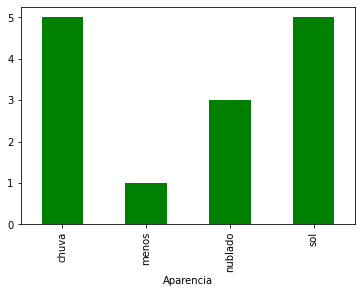

In [12]:
aparencia.plot.bar(color = 'green')

In [13]:
#Substituir fora do domínio por moda
dados.loc[dados["Aparencia"] == 'menos', 'Aparencia'] = "sol"

In [14]:
aparencia = dados.groupby(['Aparencia']).size()
aparencia

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [15]:
dados.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [20]:
dados['Umidade'].isnull().sum()

1

In [23]:
mediana = sts.median(dados['Umidade'])
mediana

85.5

In [24]:
#Substituir NAs por mediana
dados['Umidade'].fillna(mediana, inplace=True)
dados

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,sol,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [25]:
dados['Vento'].isnull().sum()

1

In [28]:
vento = dados.groupby(['Vento']).size()
vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [29]:
#Substituir NAs por FALSO conforme Moda

dados["Vento"].fillna("Falso", inplace=True)

In [30]:
dados["Vento"].isnull().sum()

0

In [31]:
dados

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,sol,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,Falso,sim


In [32]:
dados['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [36]:
dados.loc[(dados['Temperatura'] > 100) | (dados["Temperatura"] < 0)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [38]:
mediana = sts.median(dados['Temperatura'])
mediana

73.5

In [39]:
#Substituir valor fora do padrão por mediana
dados.loc[(dados['Temperatura'] < 0) | (dados['Temperatura'] > 100)] = mediana 

In [41]:
#Testar
dados.loc[(dados['Temperatura'] < 0 ) | (dados["Temperatura"] > 100 )]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [42]:
dados.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [43]:
dados.shape

(14, 5)